In [1]:
import sys
import os 
src_dir = os.path.join(os.getcwd(), '..', 'src')
sys.path.append(src_dir)

In [2]:
import torch
import numpy as np
import seaborn as sns
import pandas as pd
import torchattacks as ta
import matplotlib.pyplot as plt
import seaborn as sns

from models import mnist, cifar
from data_attacks import alg1, alg2, alg3, attackAny
from load_data import load_mnist, load_mnist_inv, load_cifar
from utils import test_attack, att
from utils import vis_attack as vis
from utils import saveAttackResults as testSave

In [3]:
net1 = mnist.MNIST1()
net1.load_state_dict(torch.load('../models/mnist-net1.pt'))
net1.eval()

net2 = mnist.MNIST2()
net2.load_state_dict(torch.load('../models/mnist-net2.pt'))
net2.eval()

net3 = mnist.MNIST3()
net3.load_state_dict(torch.load('../models/mnist-net3.pt'))
net3.eval()

net4 = mnist.MNIST4()
net4.load_state_dict(torch.load('../models/mnist-net4.pt'))
net4.eval()

netInv1 = mnist.MNIST1()
netInv1.load_state_dict(torch.load('../models/mnistInv-net1.pt'))
netInv1.eval()

netInv2 = mnist.MNIST2()
netInv2.load_state_dict(torch.load('../models/mnistInv-net2.pt'))
netInv2.eval()

netInv3 = mnist.MNIST3()
netInv3.load_state_dict(torch.load('../models/mnistInv-net3.pt'))
netInv3.eval()

netInv4 = mnist.MNIST4()
netInv4.load_state_dict(torch.load('../models/mnistInv-net4.pt'))
netInv4.eval()

netCif1 = cifar.CIFAR1()
netCif1.load_state_dict(torch.load('../models/cifar-net1.pt'))
netCif1.eval()

netCif2 = cifar.CIFAR2()
netCif2.load_state_dict(torch.load('../models/cifar-net2.pt'))
netCif2.eval();

In [4]:
net = net2
n = 10
alg = attackAny.Any(alg1.Al1())
data = load_mnist.testSetCorrect(net,n)

testSave.any(net,data,alg,'alg1Any')

In [4]:
with torch.no_grad():
    id = 3
    net = net4
    im = load_mnist.testSetCorrect(net,id+1)[id][0]
    al1 = alg2.Al1(disp=True, n=100)
    al2 = alg3.Al1(disp=True, n=100)
    al3 = alg3.Al1(disp=True, type=2, n=100)


    epss1 = al1(net,im,3)
    epss2 = al2(net,im,3)
    epss3 = al3(net,im,3)

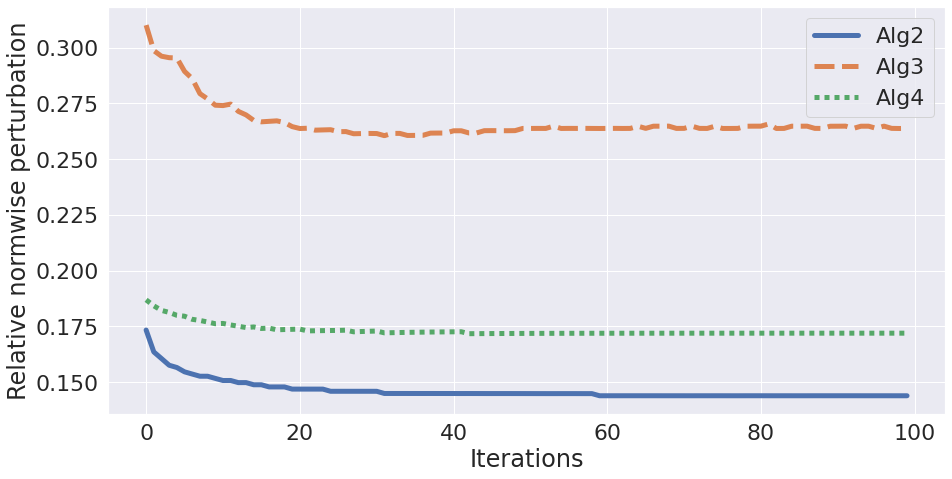

In [11]:
col=  ['Alg2', 'Alg3', 'Alg4']
res = pd.DataFrame(np.transpose(np.vstack([epss1,epss2,epss3])),columns=col)
res['Iterations'] = res.index
lw = 5
sns.set(rc={"figure.figsize": (15, 7.5)})
sns.set(font_scale=2)
res = res.melt('Iterations', col, 'Algorithm', 'Eps')
ax = sns.lineplot(data=res, x='Iterations', y='Eps', hue='Algorithm', lw=lw, style='Algorithm')
ax.set(ylabel='Relative normwise perturbation')
leg_lines = plt.legend().get_lines()
for line in leg_lines:
    plt.setp(line, linewidth=lw)

fig = ax.get_figure()
fig.savefig('../resultsFinal/iterations1.png', bbox_inches='tight')


In [ ]:
with torch.no_grad():
    id = 60
    net = net2
    im = load_mnist.testSetCorrect(net,id+1)[id][0]
    vis.vis_attack(net,im,[alg1.Al1(),alg2.Al1(),alg3.Al1()],name='num_comp8')

In [ ]:
n=10
net = net2
correct = load_mnist.testSetCorrect(net,n)
res1 = test_attack.specific(net,correct,alg1.Al1())
res2 = test_attack.specific(net,correct,alg2.Al1())
res3 = test_attack.specific(net,correct,alg3.Al1())

In [ ]:
names = ['Alg1', 'Alg2', 'Alg3']
res = pd.DataFrame(np.hstack((res1,res2,res3)),columns = names)
res['its'] = res.index
dfm = res.melt('its', var_name='Algorithm', value_name='eps')

In [ ]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.set(font_scale=2)
ax = sns.ecdfplot(data=dfm,x='eps',hue='Algorithm',complementary=True)
ax.set(xlabel='eps')
fig = ax.get_figure()
fig.savefig('../results/plotComp1', bbox_inches='tight')

In [ ]:
sns.set(font_scale=1)
with torch.no_grad():
    id = 0
    net = net2
    im = load_mnist.testSetCorrect(net,id+1)[id][0]
    vis.vis_attack(net,im,[alg3.Al1(type=0),alg3.Al1(type=1),alg3.Al1(type=2)],name='num_comp_types')

0: index 3  class 9, 2

1: index 2  class 2, 2

2: index 1  class 5, 0

3: index 17 class 7, 1

4: index 4  class 8, 8

5: index 14 class 9, 1

6: index 10 class 3, 0

7: index 0  class 5, 5

8: index 60 class 7, 4

9: index 7  class 3, 1

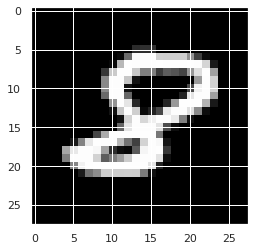

In [39]:
id = 60
plt.imshow(load_mnist.testSetCorrect(net,id+1)[id][0].reshape((28,28)),cmap='gray')
plt.show()

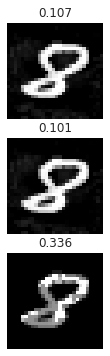

In [40]:
sns.set(font_scale=1)
with torch.no_grad():
    net = net2
    im = load_mnist.testSetCorrect(net,id+1)[id][0]
    vis.vis_attack(net,im,[alg1.Al1(),alg2.Al1(),alg3.Al1()],name='num_comp8', targeted=True,cl=7)

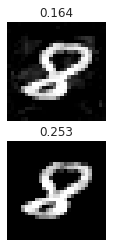

In [41]:
sns.set(font_scale=1)
with torch.no_grad():
    net = net2
    im = load_mnist.testSetCorrect(net,id+1)[id][0]
    vis.vis_attack(net,im,[alg2.Al1(),alg3.Al1(type=2)],name='num_comp_types8',targeted=True,cl=4)

In [ ]:
sns.set(font_scale=1)
net = net2
im = load_mnist.testSetCorrect(net,id+1)[id][0]
atk1 = ta.PGDL2(net, eps=0.1, alpha=0.1, steps=4)
atk2 = ta.DeepFool(net, steps=10)
vis.vis_attack(net,im,[attackAny.Any(alg2.Al1()),att.Att(atk1),att.Att(atk2)],targeted=False,name='num_comp_algs8')

In [ ]:
n=10
net = net2
correct = load_mnist.testSetCorrect(net,n)
res1 = test_attack.specific(net,correct,alg3.Al1(type=0))
res2 = test_attack.specific(net,correct,alg3.Al1(type=1))
res3 = test_attack.specific(net,correct,alg3.Al1(type=2))

In [ ]:
names = ['0', '1', '2']
res = pd.DataFrame(np.hstack((res1,res2,res3)),columns = names)
res['its'] = res.index
dfm = res.melt('its', var_name='Algorithm 3 with type', value_name='eps')

In [ ]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.set(font_scale=2)
ax = sns.ecdfplot(data=dfm,x='eps',hue='Algorithm 3 with type',complementary=True)
ax.set(xlabel='eps')
fig = ax.get_figure()
fig.savefig('../results/plotCompTypes', bbox_inches='tight')

In [ ]:
sns.set(font_scale=1)
with torch.no_grad():
    id = 6
    net = netInv2
    im = load_mnist_inv.testSetCorrect(net,id+1)[id][0]
    vis.vis_attack(net,im,[alg3.Al1(),alg3.Al1(type=2),alg3.Al1(tolerance=1),alg3.Al1(type=1,tolerance=1),alg3.Al1(type=2,tolerance=1),alg1.Al1()],name='num_comp_tolerance2Inv')

In [ ]:
n=10
net = net2
correct = load_mnist.testSetCorrect(net,n)
res1 = test_attack.specific(net,correct,alg3.Al1(type=0))
res2 = test_attack.specific(net,correct,alg3.Al1(type=0,tolerance=1))
res3 = test_attack.specific(net,correct,alg3.Al1(type=2))
res4 = test_attack.specific(net,correct,alg3.Al1(type=2, tolerance=1))

In [ ]:
res5 = test_attack.specific(net,correct,alg3.Al1(type=1, tolerance=1))

In [ ]:
names = ['Alg3(0,0)', 'Alg3(0,2)', 'Alg3(1,0)', 'Alg3(1,1)', 'Alg3(1,2)']
res = pd.DataFrame(np.hstack((res1,res3,res2,res5,res4)),columns = names)
res['its'] = res.index
dfm = res.melt('its', var_name='Algorithm', value_name='eps')

In [ ]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.set(font_scale=2)
ax = sns.ecdfplot(data=dfm,x='eps',hue='Algorithm',complementary=True)
ax.set(xlabel='eps')
fig = ax.get_figure()
fig.savefig('../results/plotCompTolerance', bbox_inches='tight')

In [ ]:
n=10
correct2 = load_mnist.testSetCorrect(net2,100+n)[-n:]
correct4 = load_mnist.testSetCorrect(net4,n)
#res1 = test_attack.specific(net2,correct2,alg2.Al0(num=False))
#res2 = test_attack.specific(net2,correct2,alg2.Al0(num=True))
res3 = test_attack.specific(net2,correct2,alg3.Al0(num=False))
#res4 = test_attack.specific(net2,correct2,alg3.Al0(num=True))
#res5 = test_attack.specific(net4,correct4,alg2.Al0(num=False))
#res6 = test_attack.specific(net4,correct4,alg2.Al0(num=True))
#res7 = test_attack.specific(net4,correct4,alg3.Al0(num=False))
#res8 = test_attack.specific(net4,correct4,alg3.Al0(num=True))

In [ ]:
names = ['Net1 alg2', 'Net1 alg2 num', 'Net1 alg3', 'Net1 alg3 num', 'Net2 alg2', 'Net2 alg2 num', 'Net2 alg3', 'Net2 alg3 num']
results = np.hstack((res1,res2,res3,res4,res5,res6,res7,res8))
np.save('results',results)
res = pd.DataFrame(results,columns = names)
res['its'] = res.index
dfm = res.melt('its', var_name='Algorithm', value_name='eps')

In [ ]:
results = np.load('results.npy')
names = ['Net1 alg2', 'Net1 alg2 num', 'Net1 alg3', 'Net1 alg3 num', 'Net3 alg2', 'Net3 alg2 num', 'Net3 alg3', 'Net3 alg3 num']
res = pd.DataFrame(results,columns = names)
res['its'] = res.index
dfm = res.melt('its', var_name='Algorithm', value_name='eps')

In [ ]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.set(font_scale=2)
ax = sns.ecdfplot(data=dfm,x='eps',hue='Algorithm',complementary=True)
ax.set(xlabel='Relative normwise error')
fig = ax.get_figure()
fig.savefig('../results/plotNumerical2', bbox_inches='tight')

tensor([8])
0.12499741


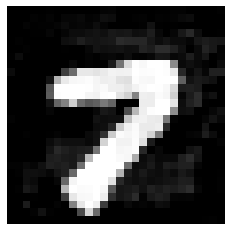

In [5]:
id = 78
net = net2
correct = load_mnist.testSetCorrect(net,id+1)
atk1 = att.Att(ta.DeepFool(net, steps=10))
atk2 = attackAny.Any(alg3.Al1(type=2))
vis.vis_attack(net,correct[id][0],[atk1], targeted=False, inverted=False)

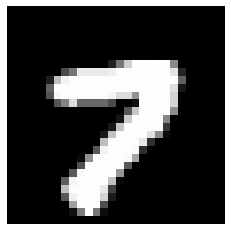

In [8]:
id = 78
net = net2
correct = load_mnist.testSetCorrect(net,id+1)
im = torch.ones(28) - correct[id][0].reshape((28,28))
plt.axis("off")
plt.imshow(im, cmap='gray')
plt.savefig('../results/original6.png',bbox_inches='tight')

In [ ]:
with torch.no_grad():
    id = 2
    net = netCif2
    correct = load_cifar.testSetCorrect(net,id+1)
    vis.vis_attack(net,correct[id][0],[alg3.Al1(),alg3.Al1(type=2),alg3.Al1(tolerance=1),alg3.Al1(type=1,tolerance=1),alg2.Al0()],name='cifarComp')

In [ ]:
id = 26
net = net1
correct = load_mnist.testSetCorrect(net,50)
img = correct[id][0]
atk = ta.PGDL2(net, eps=0.8, alpha=0.1, steps=400)
vis.vis_attack(net,correct[id][0],att.Att(atk))

In [ ]:
n=100
net = net2
correct = load_mnist.testSetCorrect(net,n)

atk1 = ta.PGDL2(net, eps=0.1, alpha=0.1, steps=4)
atk2 = ta.DeepFool(net, steps=10)
res1 = test_attack.any(net,correct,att.Att(atk1))
res2 = test_attack.any(net,correct,att.Att(atk2))
res3 = test_attack.any(net,correct,attackAny.Any(alg2.Al1()))

In [ ]:
names = ['PGDL2', 'Deep Fool', 'Alg2']
res = pd.DataFrame(np.hstack((res1,res2,res3)),columns = names)
res['its'] = res.index
dfm = res.melt('its', var_name='Algorithm', value_name='eps')

In [ ]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.set(font_scale=2)
ax = sns.ecdfplot(data=dfm,x='eps',hue='Algorithm',complementary=True)
ax.set(xlabel='Relative normwise error')
fig = ax.get_figure()
fig.savefig('../results/plotCompareOthers', bbox_inches='tight')

In [ ]:
n=10
correct2 = load_mnist.testSetCorrect(net2,n)
correct3 = load_mnist.testSetCorrect(net3,n)
correct4 = load_mnist.testSetCorrect(net4,n)

res1 = test_attack.specific(net2,correct2,alg2.Al1())
res2 = test_attack.specific(net2,correct2,alg3.Al1())
res3 = test_attack.specific(net3,correct3,alg2.Al1())
res4 = test_attack.specific(net3,correct3,alg3.Al1())
res5 = test_attack.specific(net4,correct4,alg2.Al1())
res6 = test_attack.specific(net4,correct4,alg3.Al1())

In [ ]:
names = ['Net 1 alg2', 'Net 2 alg2', 'Net 3 alg2', 'Net 1 alg3', 'Net 2 alg3', 'Net 3 alg3']
res = pd.DataFrame(np.hstack((res1,res3,res5,res2,res4,res6)),columns = names)
np.save('resultsArch',res)
res['its'] = res.index
dfm = res.melt('its', var_name='Algorithm', value_name='eps')

In [ ]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.set(font_scale=2)
ax = sns.ecdfplot(data=dfm,x='eps',hue='Algorithm',complementary=True)
ax.set(xlabel='Relative normwise error')
fig = ax.get_figure()
fig.savefig('../results/plotCompareArchitectures', bbox_inches='tight')

In [ ]:
with torch.no_grad():
    id = 6
    net = net4
    im = load_mnist.testSetCorrect(net,id+1)[id][0]
    atk = alg2.Al1()

In [ ]:
import matplotlib.pyplot as plt
newIm, eps = atk(net,im,8)
plt.axis("off")
plt.imshow(newIm.squeeze(),cmap='gray')

In [ ]:
plt.axis("off")
plt.imshow(im.squeeze(),cmap='gray')

In [ ]:
net(newIm)